In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
! pwd

/Users/atifumacaxi/code/atifumacaxi/Fertility_and_Schooling


In [105]:
#Reading 'education' dataset
df_education = pd.read_csv('./raw_data/education.csv', sep=';')
df_education.head()

,Entity,Code,Year,avg_years_of_schooling
0,Afghanistan,AFG,1870,0.01
1,Afghanistan,AFG,1875,0.01
2,Afghanistan,AFG,1880,0.01
3,Afghanistan,AFG,1885,0.01
4,Afghanistan,AFG,1890,0.01


In [7]:
#Reading 'fertility' dataset
df_fertility = pd.read_csv('./raw_data/fertility.csv')
df_fertility.head()

,Country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,_World,4.98,5.00,5.03,5.05,5.06,5.04,4.99,4.97,4.92,...,2.50,2.49,2.47,2.46,2.46,2.44,2.43,2.41,2.40,2.39
1,Afghanistan,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,7.45,...,5.77,5.56,5.36,5.16,4.98,4.80,4.63,4.47,4.32,4.18
2,Albania,6.49,6.40,6.28,6.13,5.96,5.77,5.58,5.39,5.22,...,1.67,1.68,1.69,1.69,1.68,1.66,1.64,1.62,1.60,1.58
3,Algeria,7.52,7.57,7.61,7.65,7.67,7.68,7.68,7.67,7.67,...,2.91,2.95,2.99,3.02,3.04,3.05,3.05,3.02,2.99,2.94
4,Angola,6.71,6.79,6.87,6.95,7.04,7.12,7.19,7.27,7.33,...,6.12,6.04,5.95,5.86,5.77,5.69,5.60,5.52,5.44,5.37


# EDA

## Schooling improvement

### The first information that we want to see is how many years each country has improved in schooling annual mean

In [139]:
#Limiting years >= 1960
df_educ = df_education[df_education['Year']>=1960]

In [140]:
df_1960 = df_educ[df_educ['Year']==1960]
df_2017 = df_educ[df_educ['Year']==2017]

In [143]:
df_education_improved = df_1960.merge(df_2017, how='left', on='Entity')
df_education_improved['years_improved'] = df_education_improved['avg_years_of_schooling_y'] - df_education_improved['avg_years_of_schooling_x']

In [154]:
df_education_improved.dropna(inplace=True)

In [165]:
df_education_improved.sort_values(by='years_improved', ascending=False)

,Entity,Code_x,Year_x,avg_years_of_schooling_x,Code_y,Year_y,avg_years_of_schooling_y,years_improved
137,United Arab Emirates,ARE,1960,1.38,ARE,2017.0,10.8,9.42
58,Iran,IRN,1960,0.60,IRN,2017.0,9.8,9.20
75,Lithuania,LTU,1960,3.94,LTU,2017.0,13.0,9.06
65,Jordan,JOR,1960,1.42,JOR,2017.0,10.4,8.98
119,South Korea,KOR,1960,3.12,KOR,2017.0,12.1,8.98
...,...,...,...,...,...,...,...,...
80,Maldives,MDV,1960,3.42,MDV,2017.0,6.3,2.88
18,Burundi,BDI,1960,0.38,BDI,2017.0,3.0,2.62
81,Mali,MLI,1960,0.13,MLI,2017.0,2.3,2.17
96,Niger,NER,1960,0.39,NER,2017.0,2.0,1.61


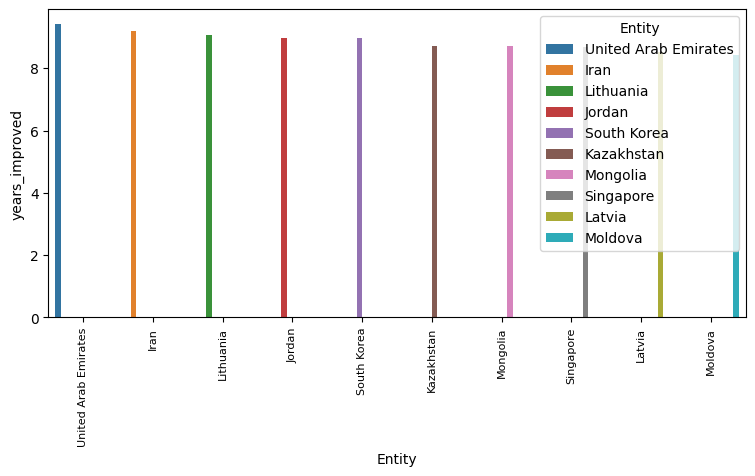

In [177]:
fig, ax = plt.subplots(figsize=(9, 4))

df_education_improved.sort_values(by='years_improved', ascending=False, inplace=True)

sns.barplot(data=df_education_improved.head(10), x='Entity', y='years_improved', hue='Entity', ax=ax)
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', labelsize=8)
plt.show()


In [173]:
df_education_improved.nunique()

Entity                      143
Code_x                      143
Year_x                        1
avg_years_of_schooling_x    130
Code_y                      143
Year_y                        1
avg_years_of_schooling_y     79
years_improved              134
dtype: int64

In [94]:
#Creates df_countries
df_countries = df_educ.groupby(['Entity']).count().sort_values(by='Code', ascending=False)

In [137]:
df_educ[df_educ['Entity']=='Algeria']

,Entity,Code,Year,avg_years_of_schooling
122,Algeria,DZA,1960,0.72
123,Algeria,DZA,1965,0.64
124,Algeria,DZA,1970,0.78
125,Algeria,DZA,1975,1.18
126,Algeria,DZA,1980,1.72
127,Algeria,DZA,1985,2.51
128,Algeria,DZA,1990,3.38
129,Algeria,DZA,1991,3.80
130,Algeria,DZA,1992,4.00
131,Algeria,DZA,1993,4.30


In [133]:
df_1960 = df_educ[df_educ['Year']==1960]
df_2017 = df_educ[df_educ['Year']==2017]

In [135]:
df_ = df_1960.merge(df_2017, how='left', on='Entity')
df_1960

,Entity,Code_x,Year_x,avg_years_of_schooling_x,Code_y,Year_y,avg_years_of_schooling_y
0,Afghanistan,AFG,1960,0.22,AFG,2017.0,3.8
1,Albania,ALB,1960,2.32,ALB,2017.0,10.0
2,Algeria,DZA,1960,0.72,DZA,2017.0,8.0
3,Argentina,ARG,1960,5.32,ARG,2017.0,9.9
4,Armenia,ARM,1960,7.61,ARM,2017.0,11.7
...,...,...,...,...,...,...,...
141,Venezuela,VEN,1960,1.93,VEN,2017.0,10.3
142,Vietnam,VNM,1960,2.01,VNM,2017.0,8.2
143,Yemen,YEM,1960,0.01,YEM,2017.0,3.0
144,Zambia,ZMB,1960,1.83,ZMB,2017.0,7.0


In [95]:
#Select only countries that have 34 or more samples (max samples between 1960 and 2017)
df_countries = df_countries[df_countries['Code']>=34]

In [112]:
df_educ[['Entity','avg_years_of_schooling']].groupby(['Entity']).count()

,avg_years_of_schooling
Entity,
Afghanistan,34
Albania,34
Algeria,34
Andorra,18
Angola,19
...,...
Venezuela,34
Vietnam,34
Yemen,34


In [ ]:
sns.lineplot(data=df_educ, x='Year', y='avg_years_of_schooling', hue='Entity')